In [1]:
#import libraries to use
import time
start_time = time.time()

import utils.slab as slab
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


### 1. CREATE A SLAB OBJECT

A slab object is built with the attributes contained in the `input.json` file and  `scaling_relationship.json` file. Other attributes are computed internally based on the input information.

In [2]:
#Specify input json file and scaling_relationship file paths
input_file='../config_files/Parameters/input.json'
scaling_file='../config_files/Parameters/scaling_relationship_Leonard.json'

#Initialize an instance of the class Slab with the input files
Slab_obj=slab.Slab(input_file,scaling_file)

reading input.json file
reading scaling_relationship_Leonard.json file
Great! You already have nodes and cells, I'm just writing

reading mesh


First the software computes the preliminary matrix of the node distances and the connectivity matrix of the mesh. The areas of the mesh elements is then computed

In [3]:
Slab_obj.Element2Element()
Slab_obj.compute_matrix_distance()
Slab_obj.compute_area()

Distance matrix computed!


The following section shows two plots the mesh. On the left the elements are plotted highlighting the depth of the cells. On the right, the Slip-PDF based on variable and rigidity with depth is shown, as outlined in Scala et al. 2020

PLOT SLAB MESH AND THE COMPUTED SPDF


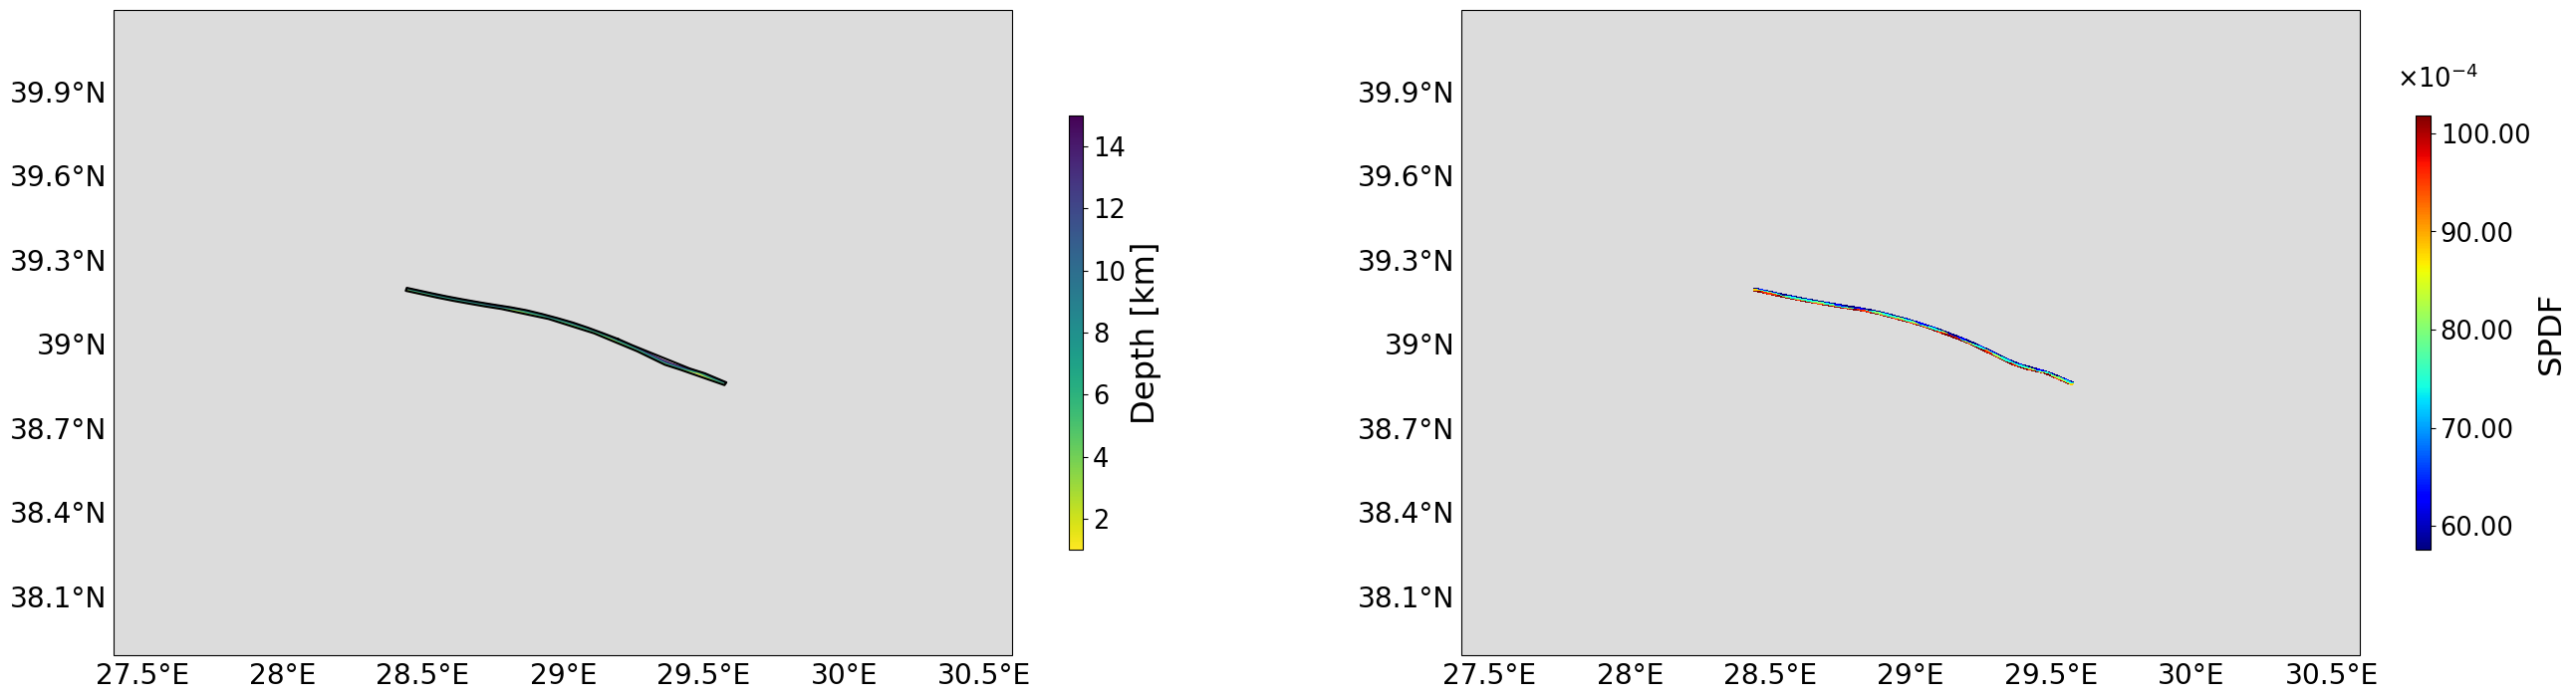

In [4]:
import warnings
warnings.filterwarnings("ignore")
#plot slab and SPDF (Slip Probability Density Function)
print('PLOT SLAB MESH AND THE COMPUTED SPDF')
#PLOT SLAB MESH AND COMPUTED SPDF

fig = plt.figure(figsize=(32, 16))
subplots=121
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)
#Plot Slab mesh
Slab_obj.plot_slab(ax,fig,colorbar=True)
if Slab_obj.isboundary:
    Slab_obj.plot_boundary(ax)
subplots=122
#generate default basemap
fig,ax1=Slab_obj.plot_basemap(fig,subplots)
#Plot SPDF 
ax1,sc, cbar=Slab_obj.plot_SPDF(ax1,fig,colorbar=True, save=True)








### 2. SELECTION OF RUPTURE BARYCENTERS

The second step will generate a selection of rupture barycenters having a fixed `minimum_interdistance`.
This distance is optimised to avoid to have too much similar rupture areas, in particular for large magnitude values. 
This selection is based on the magnitude binning and the selected scaling laws that are set in the file `scaling_relationships.json`.
For this, it applies the subroutines  `active_barycenters()` and `select_barycenter2()` contained in `Slab_obj`.




In [5]:
#Select active barycenters for the whole subduction 
Slab_obj.active_barycenters()
#Selection of barycenters for case-study (PTF) or hazard
Slab_obj.select_barycenter2()

Barycenter selection
Magnitude bin # 0 - Mw=7.0737
Barycenter selection (PTF)
Magnitude bin # 0 - Mw=7.0737


Here, we can verify the selected Mw binnings and scaling relationships

In [6]:
print(f'Mw: {Slab_obj.get_magnitudes()}')
print(f'Scaling names: {Slab_obj.Name_scaling}')

Mw: [7.0737]
Scaling names: ['Leonard']


Now, let's choose from the lists above a combination of magnitude and scaling relationship and plot the respective rupture barycenters. 

PLOT BARYCENTERS FOR  Mw=7.0737 and SCALING NAME: Leonard


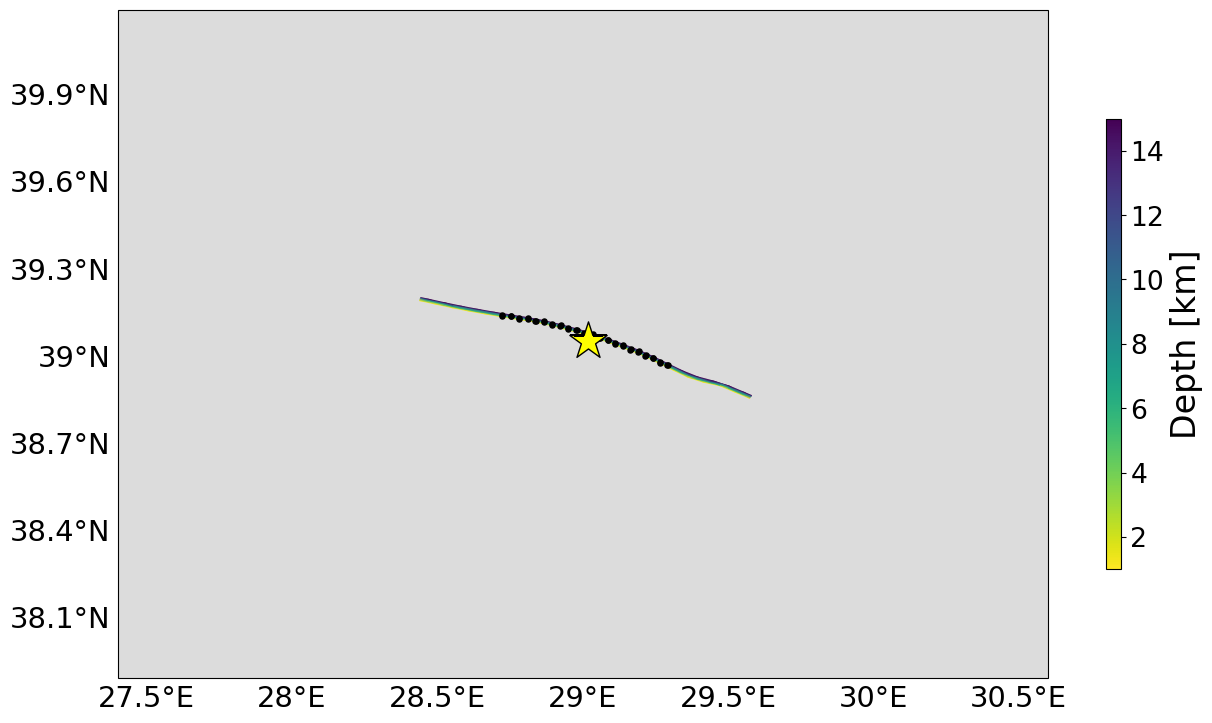

In [7]:
#plot barycenters for the specified combination of Mw and scaling relationship
Mw=7.0737
scaling='Leonard'

print(f'PLOT BARYCENTERS FOR  Mw={Mw} and SCALING NAME: {scaling}')


fig = plt.figure(figsize=(15, 15))
subplots=111
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)

#plot Slab mesh
Slab_obj.plot_slab(ax,fig,colorbar=True)

#PLOT BARYCENTERS
Slab_obj.plot_barycenters_mag(Mw,scaling,ax,fig)


### 3. RUPTURE AREAS COMPUTE

Compute the rupturing areas for every barycenter and for each combination of magnitude and scaling relationship by applying the method `rupture_areas()` contained in `Slab_obj`

In [8]:
Slab_obj.rupture_areas()

Rupturing area computation
Magnitude bin # 0 - Mw=7.0737
Rupturing areas computed!


Likewise, we can check the number of rupture areas computed for each combination of magnitude and scaling relationship.

In [9]:
Slab_obj.get_RuptAreas_number()

Mw=7.0737, Name scaling: Leonard, N=44, N_all=44


Now, let's plot an example of a computed rupturing area for a scenario with $M_w$ and scaling relationship within the ones  previously computed and using a `rupture_are_id` within the range of number of generated rupture areas shown above.

PLOT BARYCENTERS FOR  Mw=7.0737 and SCALING NAME: Leonard


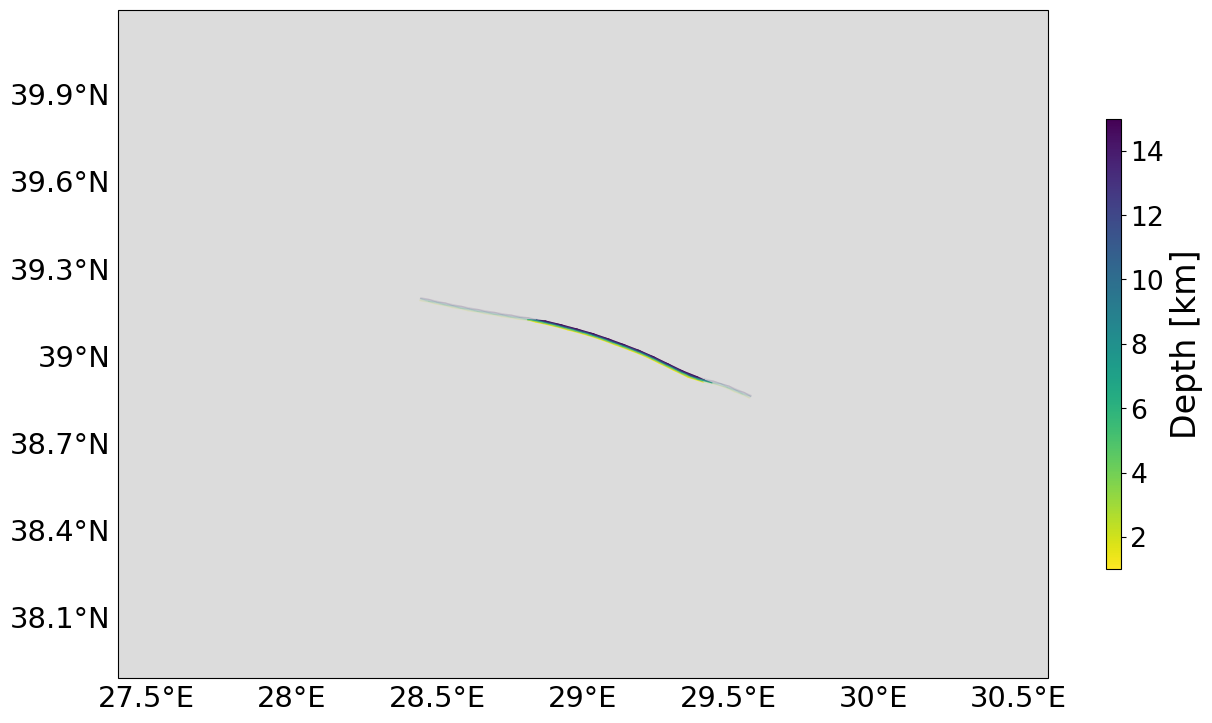

In [10]:
#plot barycenters for the specified combination of Mw and scaling name
Mw=7.0737
scaling='Leonard'
Rupture_area_id=0

print(f'PLOT BARYCENTERS FOR  Mw={Mw} and SCALING NAME: {scaling}')

fig = plt.figure(figsize=(15, 15))
subplots=111
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)


#plot rupturing area
Slab_obj.plot_rupture_area(Mw,scaling,Rupture_area_id,ax,fig,True)
#Slab_obj.plot_boundary(ax)

Finally, write the rupturing cells of each area within output files. These files will be used by the slip distribution module to define the k^-2 slip scenarios

In [11]:
#Write Output
Slab_obj.write_output_rupture_areas()
#generate folder tree for outputs
Slab_obj.generate_foldertree_slip()

Writing Output
Magnitude bin # 0 - Mw=7.0737


### SLIP DISTRIBUTION COMPUTATION ###

In [12]:
#compute slip distributions
Slab_obj.slip_distribution()

Computing slip distributions for the homogeneous and variable rigidity cases 
c:\Users\ascal\Downloads\pyANTI-FASc\Turkey_test_M70_E2902_N3906_slip_TRC\homogeneous_mu\7_0737\Leonard
c:\Users\ascal\Downloads\pyANTI-FASc\Turkey_test_M70_E2902_N3906_slip_TRC\variable_mu\7_0737\Leonard


An example of a slip distribution can be here plotted with $M_w$ and scaling relationship within the ones previously computed and using a `rupture_are_id` within the range of defined slip distributions.

In [ ]:
#plot slip distribution for the specified combination of Mw and scaling name
Mw=7.928
scaling='Leonard'
Rupture_area_id=1

print(f'PLOT SLIP DISTRIBUTION FOR  Mw={Mw} and SCALING NAME: {scaling}')

fig = plt.figure(figsize=(15, 15))
subplots=111
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)

#plot rupturing area
Slab_obj.plot_slip_dist(Mw,scaling,Rupture_area_id,ax,fig,False,True)